# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [2]:
!pip install pandas

And now we can import this package like so:

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [50]:
path = "/content/drive/MyDrive/Colab Notebooks/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [51]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [14]:
!pip install seaborn

In [15]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [22]:
def plot_continuous_distribution(data: pd.DataFrame, column : str, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}'.xticks(rotation=90));

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

<ipython-input-49-b63ade11ece2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_39, x='unit_price', y='customer_type', inner='stick', palette='Dark2')


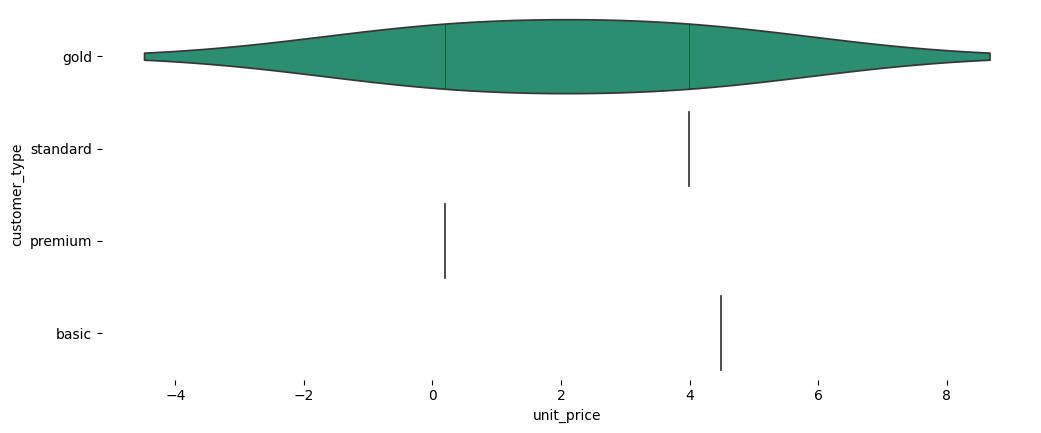

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['customer_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='unit_price', y='customer_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-48-0c791f4b259e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_38, x='unit_price', y='product_id', inner='stick', palette='Dark2')


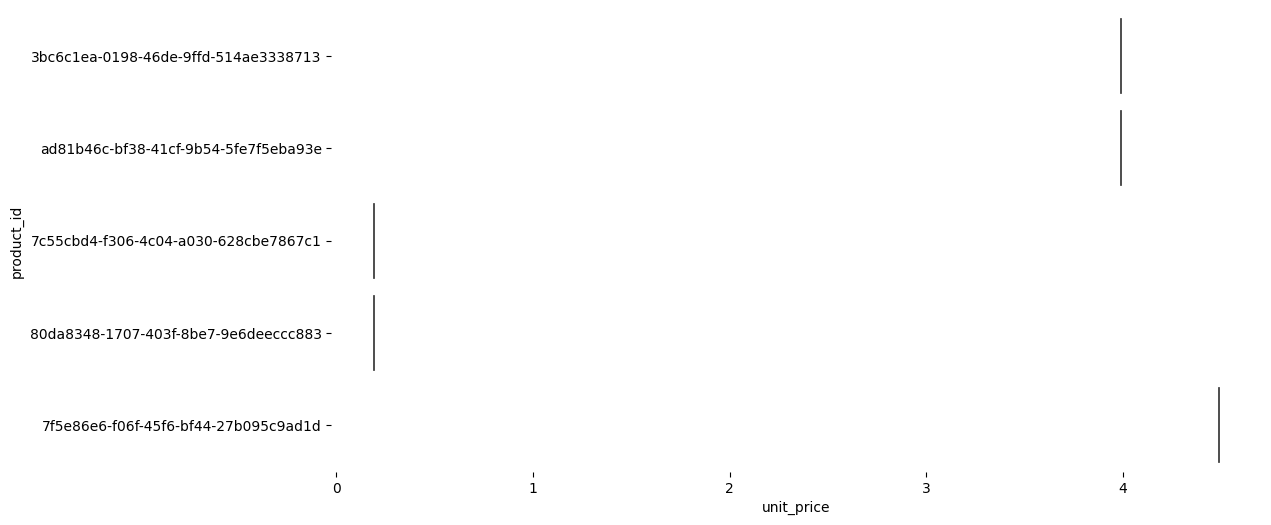

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['product_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='unit_price', y='product_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-47-275b59b0f263>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_37, x='unit_price', y='timestamp', inner='stick', palette='Dark2')


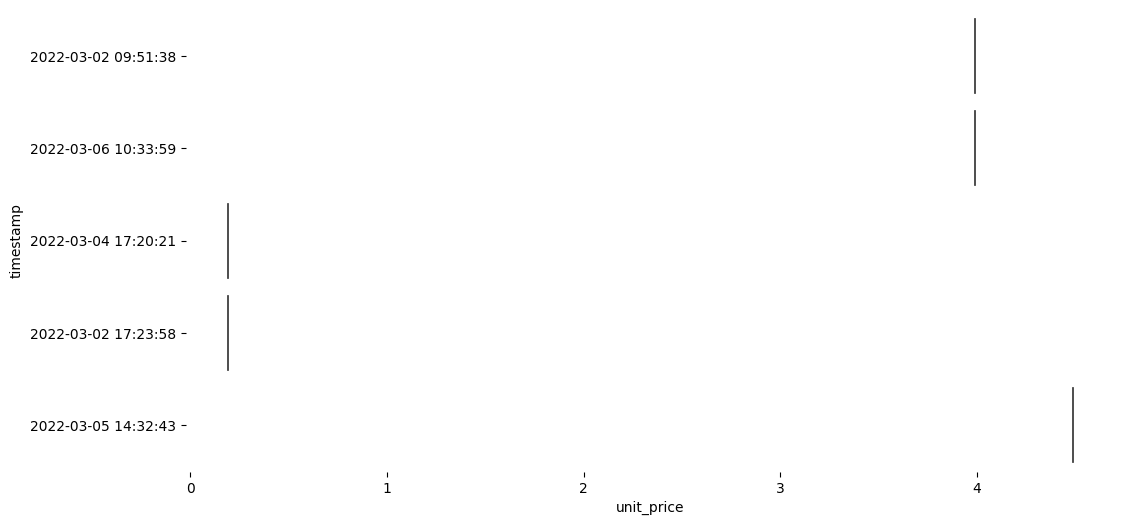

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='unit_price', y='timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-46-e046db935ff4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_36, x='unit_price', y='transaction_id', inner='stick', palette='Dark2')


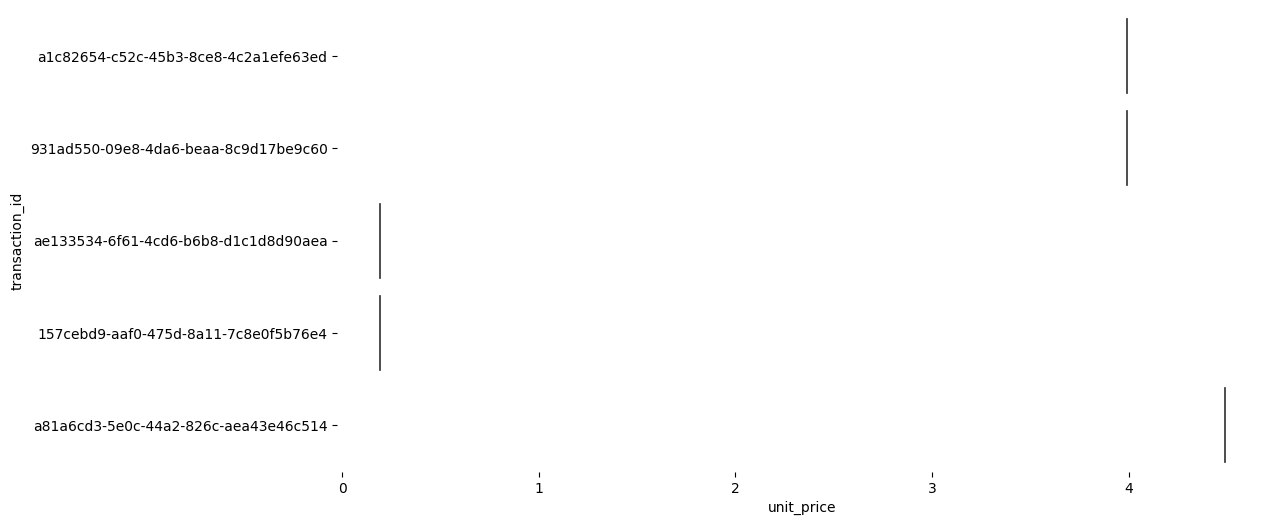

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['transaction_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='unit_price', y='transaction_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

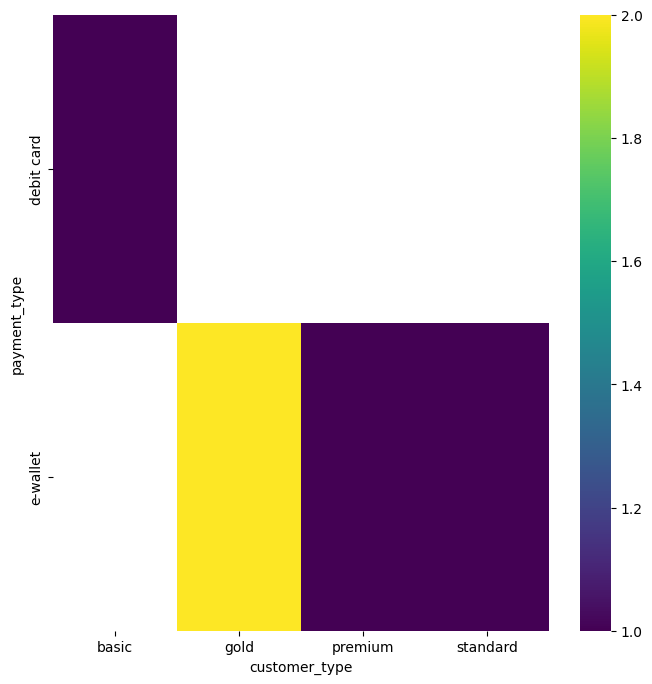

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['payment_type'].value_counts()
    for x_label, grp in _df_35.groupby('customer_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customer_type')
_ = plt.ylabel('payment_type')

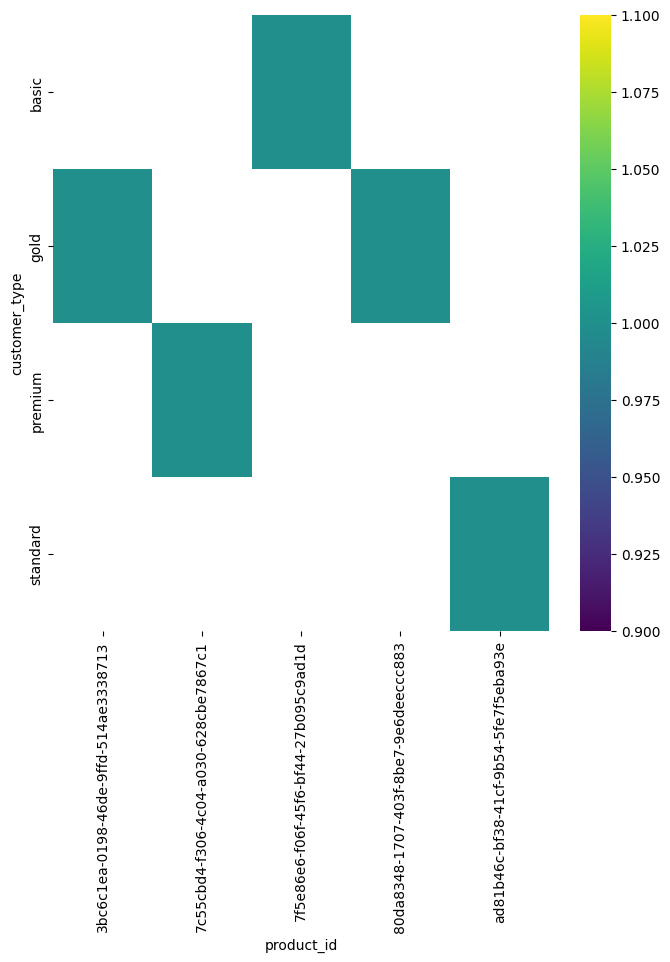

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['customer_type'].value_counts()
    for x_label, grp in _df_34.groupby('product_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('product_id')
_ = plt.ylabel('customer_type')

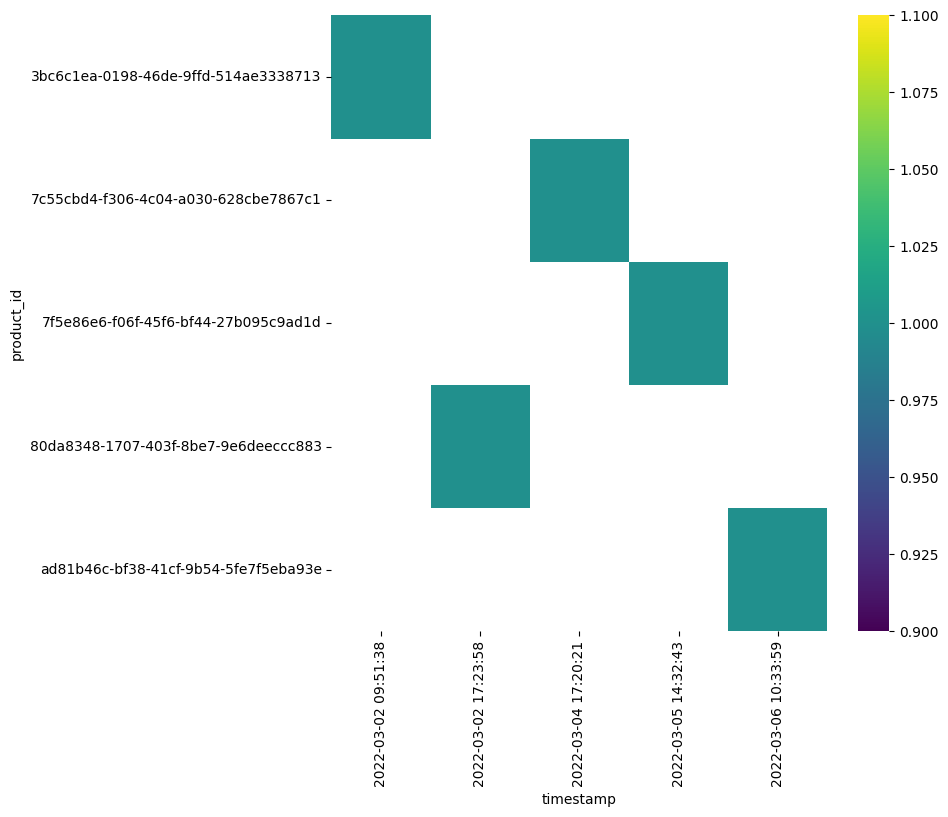

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_id'].value_counts()
    for x_label, grp in _df_33.groupby('timestamp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('timestamp')
_ = plt.ylabel('product_id')

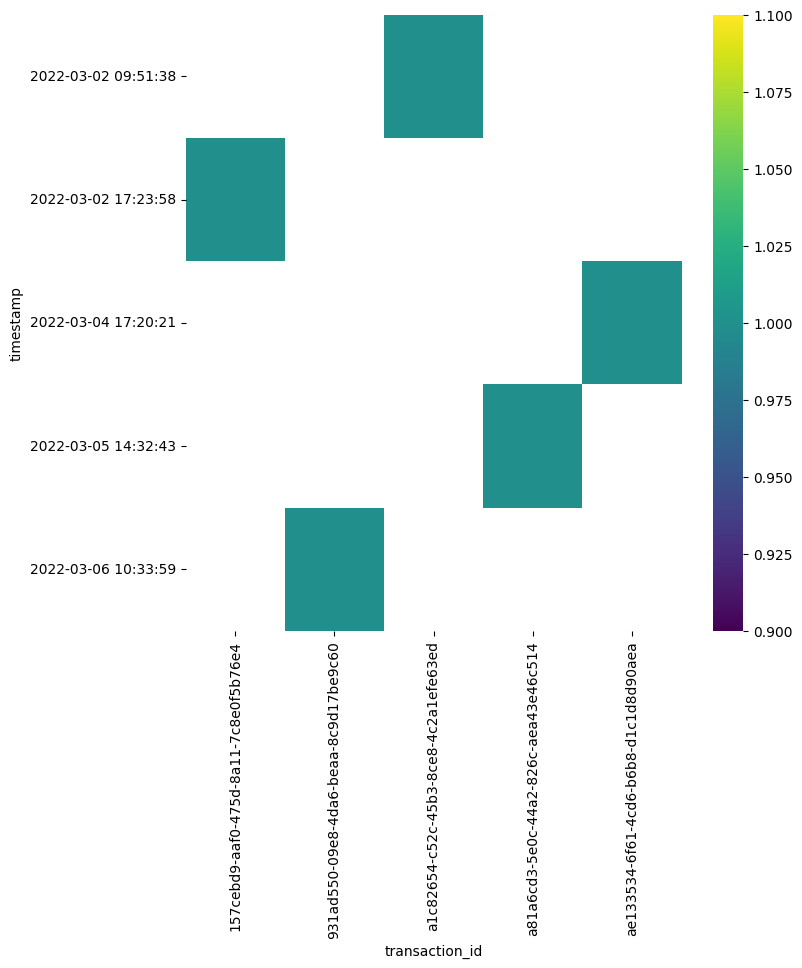

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['timestamp'].value_counts()
    for x_label, grp in _df_32.groupby('transaction_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('transaction_id')
_ = plt.ylabel('timestamp')

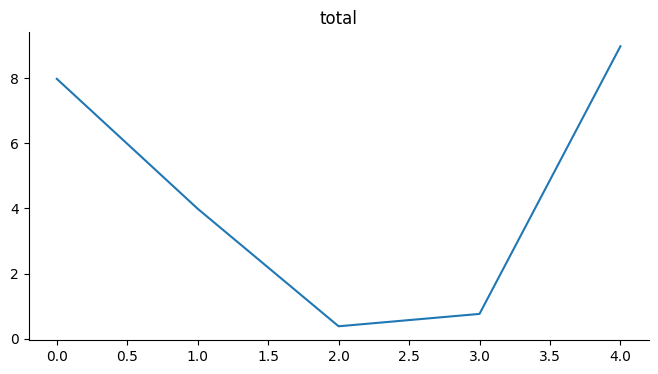

In [41]:
from matplotlib import pyplot as plt
_df_31['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

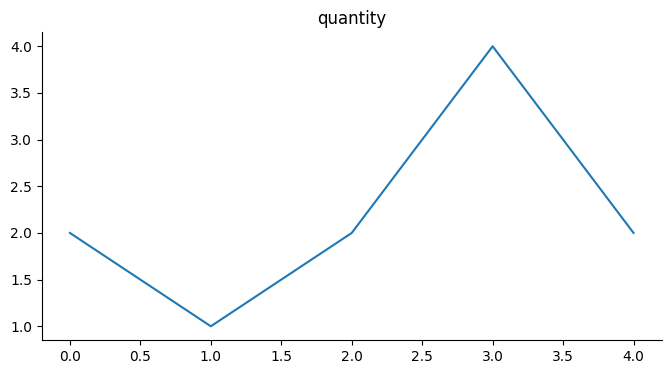

In [40]:
from matplotlib import pyplot as plt
_df_30['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

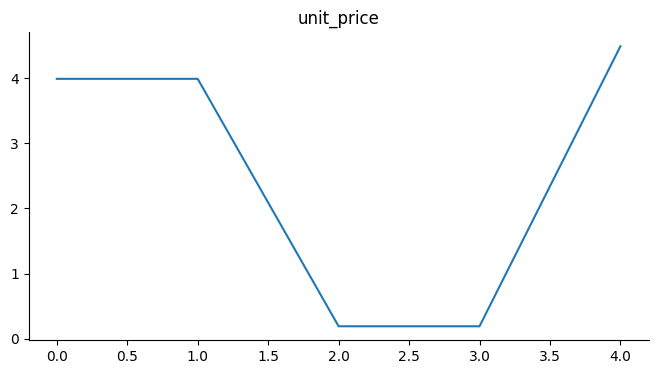

In [39]:
from matplotlib import pyplot as plt
_df_29['unit_price'].plot(kind='line', figsize=(8, 4), title='unit_price')
plt.gca().spines[['top', 'right']].set_visible(False)

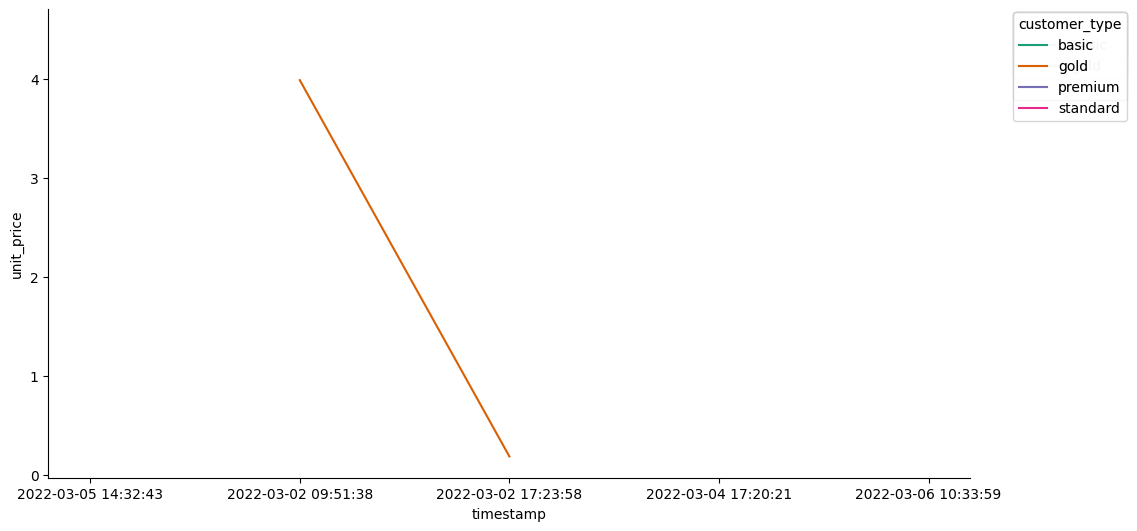

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['unit_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('unit_price')

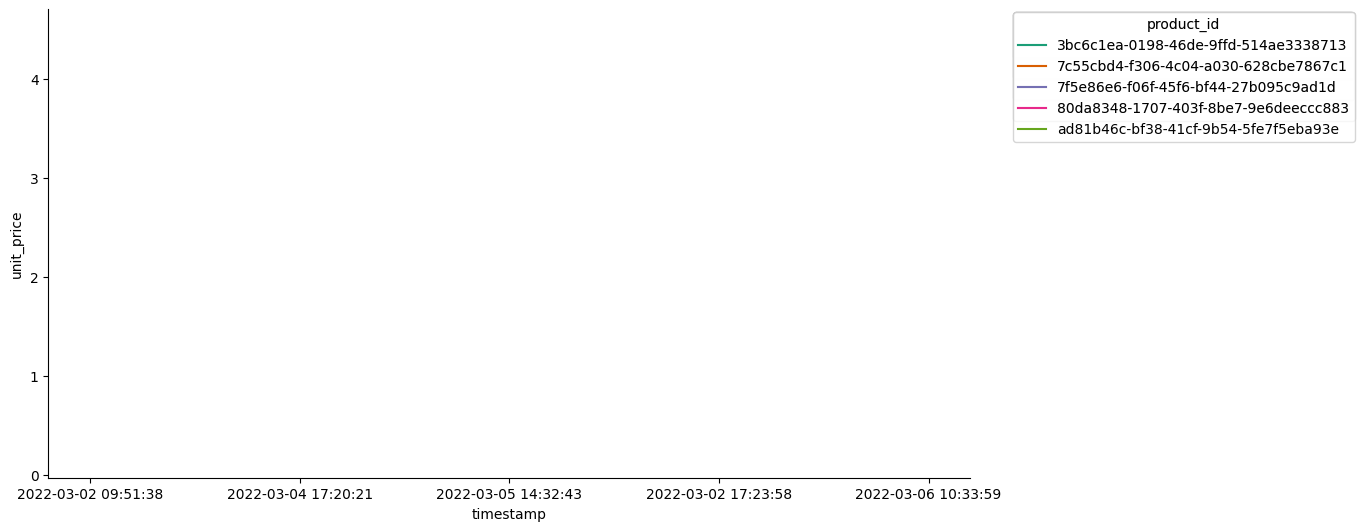

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['unit_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('product_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='product_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('unit_price')

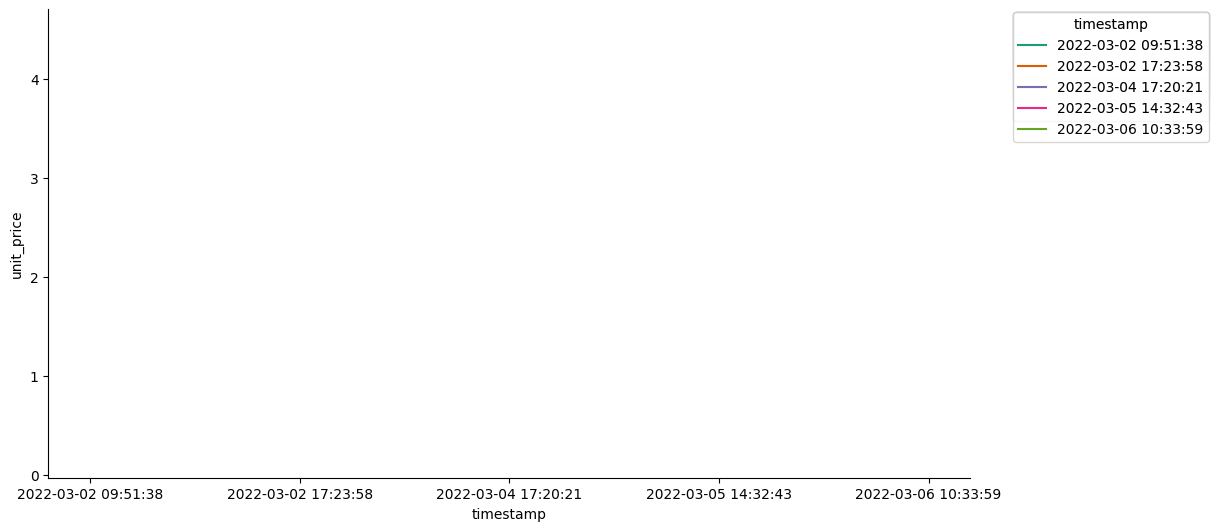

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['unit_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('unit_price')

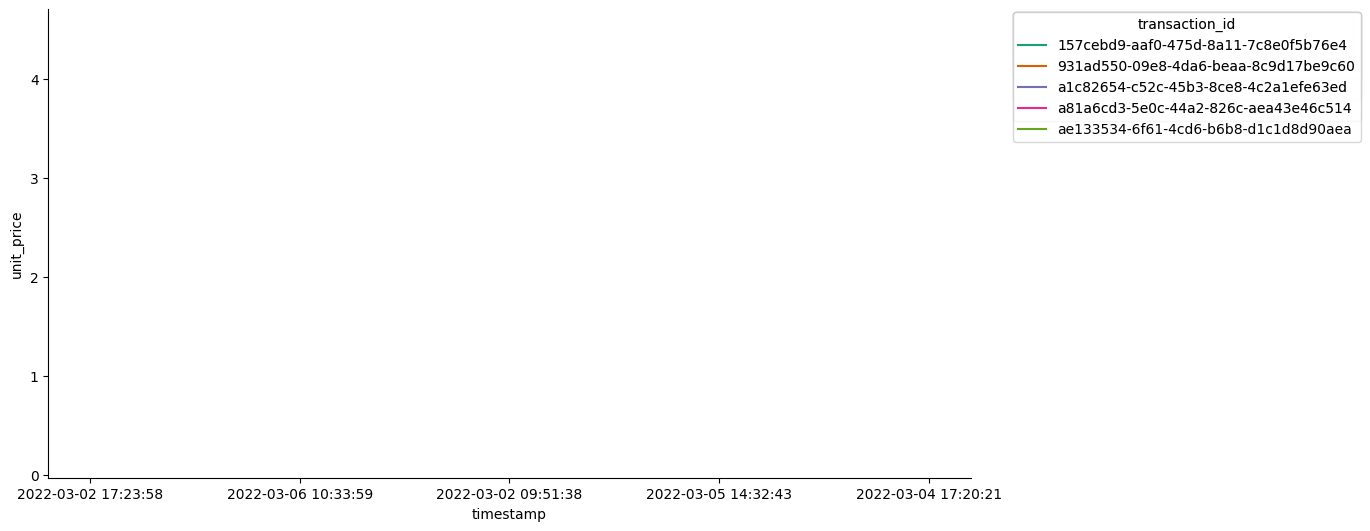

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['unit_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('transaction_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='transaction_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('unit_price')

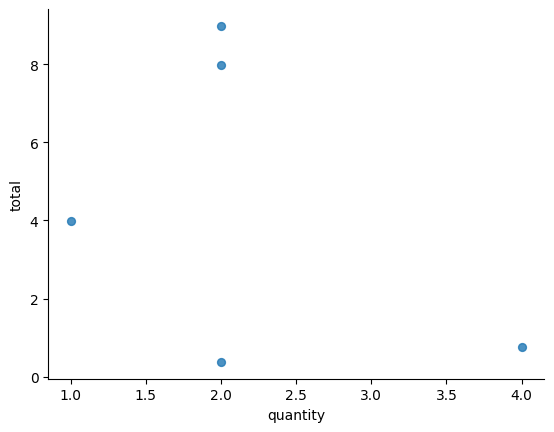

In [34]:
from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='quantity', y='total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

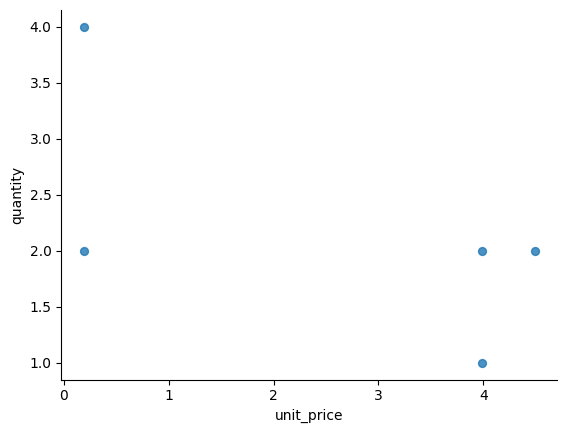

In [33]:
from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='unit_price', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

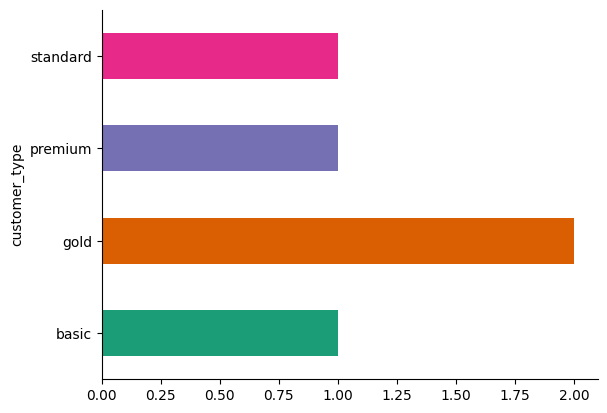

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('customer_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

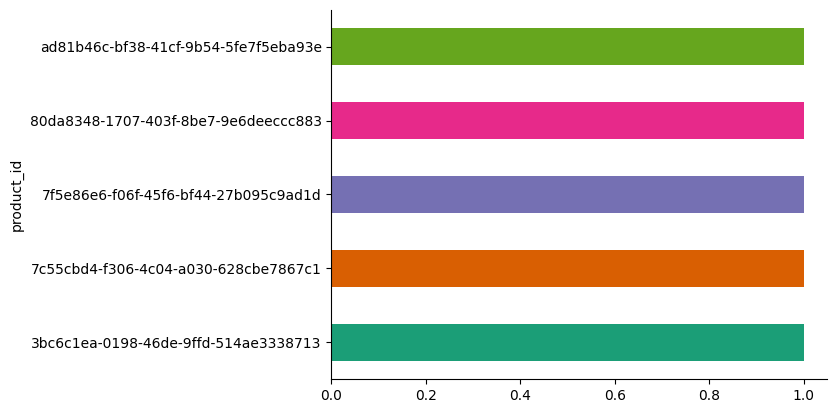

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('product_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

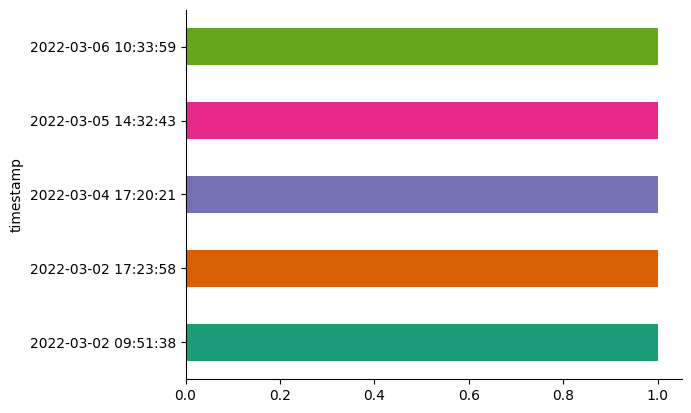

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

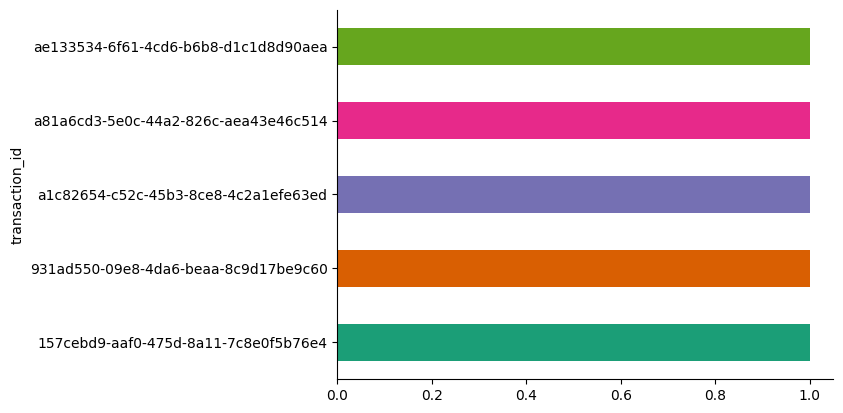

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('transaction_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

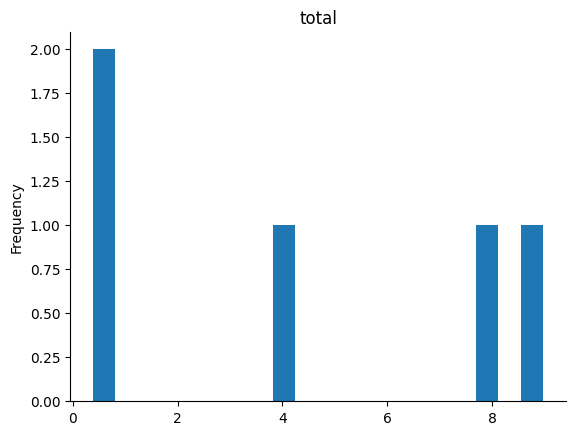

In [28]:
from matplotlib import pyplot as plt
_df_18['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

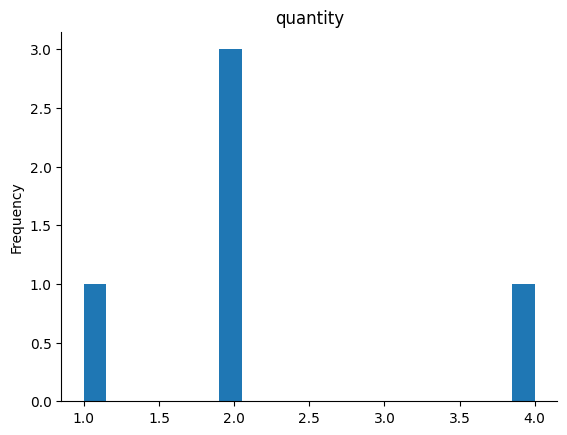

In [27]:
from matplotlib import pyplot as plt
_df_17['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

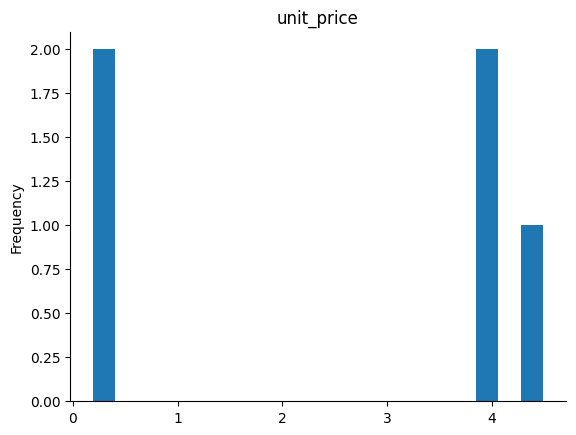

In [26]:
from matplotlib import pyplot as plt
_df_16['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

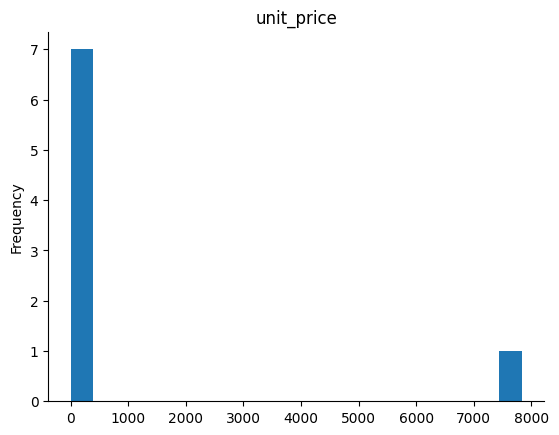

In [25]:
from matplotlib import pyplot as plt
_df_8['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for



Conclusion:

In assessing the current status of the data analysis project, it has become evident that there are pivotal areas necessitating focused attention and refinement to enhance the overall quality of the final deliverable. The subsequent crucial steps involve augmenting the existing dataset by gathering additional data from diverse stores over an extended timeframe. Furthermore, close collaboration with the client is imperative to articulate a well-defined and specific problem statement, thus refining the analysis's focus. The process of feature engineering holds significant importance to ensure the dataset incorporates pertinent columns that effectively address the precisely defined problem statement.

The provided code snippets for visualizing and analyzing the dataset are indispensable tools for gaining insights into the distribution of numeric and categorical columns, exploring unique values, and understanding correlations among numeric features. This analytical journey should be viewed as iterative, allowing for continuous adjustments and refinements as new insights surface.

Maintaining effective communication with the client is paramount throughout this process, guaranteeing that the analysis aligns seamlessly with their expectations and directly addresses the business problem in question. By diligently adhering to these steps and fostering a collaborative approach, the project is strategically positioned for success, promising to deliver a meaningful and actionable outcome.